> EDA : WAR (Russia Vs Ukraine)

<p>
    The Russo-Ukrainian War has been ongoing between Russia (alongside Russian separatists in Ukraine) and Ukraine since February 2014. Hostilities were initiated by Russia shortly after Ukraine's Revolution of Dignity and were focused on the political status of Crimea and the Donbas, which remain internationally recognized as part of Ukraine. Incursions into Ukrainian territory culminated in Russia's annexation of Crimea, followed shortly afterwards by the beginning of the war in Donbas between Russia-backed separatists and Ukrainian state forces; fighting for the first eight years of the conflict also included naval incidents, cyberwarfare, and heightened political tensions. Throughout 2021, bilateral tensions rose due to a Russian military buildup surrounding Ukrainian territory, and on 24 February 2022, the conflict saw a major escalation as Russia invaded mainland Ukraine.
    </p>

>Importing Libraries

In [1]:
# Importing all the Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.offline import init_notebook_mode
import seaborn as sns
import datetime as dt
import warnings
import plotly.graph_objects as go
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
init_notebook_mode(connected=True)

In [2]:
df1=pd.read_csv(r"./data/russia_losses_personnel.csv")
df2=pd.read_csv(r"./data/russia_losses_equipment.csv")

In [3]:
df1.head()

,date,day,personnel,personnel*,POW
0,2024-09-08,928,625260,about,NaN
1,2024-09-07,927,623990,about,NaN
2,2024-09-06,926,622720,about,NaN
3,2024-09-05,925,621550,about,NaN
4,2024-09-04,924,620350,about,NaN


In [4]:
df2.head()

,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system,greatest losses direction,vehicles and fuel tanks,cruise missiles,submarines
0,2024-09-08,928,368,328,8636,16897,17804,1180,NaN,NaN,14864,28,942,3047.0,NaN,NaN,24218.0,2588.0,1.0
1,2024-09-07,927,368,328,8632,16878,17774,1178,NaN,NaN,14784,28,942,3037.0,NaN,NaN,24171.0,2588.0,1.0
2,2024-09-06,926,368,328,8631,16878,17745,1178,NaN,NaN,14732,28,941,3037.0,NaN,NaN,24116.0,2587.0,1.0
3,2024-09-05,925,368,328,8624,16869,17725,1177,NaN,NaN,14658,28,940,3024.0,NaN,NaN,24044.0,2587.0,1.0
4,2024-09-04,924,368,328,8618,16848,17694,1177,NaN,NaN,14616,28,940,3014.0,NaN,NaN,24007.0,2580.0,1.0


> Data Information

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 927 entries, 0 to 926
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        927 non-null    object 
 1   day         927 non-null    int64  
 2   personnel   927 non-null    int64  
 3   personnel*  927 non-null    object 
 4   POW         62 non-null     float64
dtypes: float64(1), int64(2), object(2)
memory usage: 36.3+ KB


In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 927 entries, 0 to 926
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date                       927 non-null    object 
 1   day                        927 non-null    int64  
 2   aircraft                   927 non-null    int64  
 3   helicopter                 927 non-null    int64  
 4   tank                       927 non-null    int64  
 5   APC                        927 non-null    int64  
 6   field artillery            927 non-null    int64  
 7   MRL                        927 non-null    int64  
 8   military auto              65 non-null     float64
 9   fuel tank                  65 non-null     float64
 10  drone                      927 non-null    int64  
 11  naval ship                 927 non-null    int64  
 12  anti-aircraft warfare      927 non-null    int64  
 13  special equipment          908 non-null    float64

> Exploratory Data Analysis


In [7]:
df1.isnull().sum()

date            0
day             0
personnel       0
personnel*      0
POW           865
dtype: int64

In [8]:
df1.drop('POW',axis=1,inplace=True)

In [9]:
df1.describe()

,day,personnel
count,927.000000,927.000000
mean,465.000000,236935.107875
std,267.746148,179947.476127
min,2.000000,2800.000000
25%,233.500000,64500.000000
50%,465.000000,209470.000000
75%,696.500000,375650.000000
max,928.000000,625260.000000


In [10]:
df2.describe()

,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system,vehicles and fuel tanks,cruise missiles,submarines
count,927.000000,927.000000,927.000000,927.000000,927.000000,927.000000,927.000000,65.000000,65.000000,927.000000,927.000000,927.000000,908.000000,36.000000,862.000000,862.000000,361.0
mean,465.000000,289.776699,272.609493,4255.741100,8336.386192,5579.449838,633.833873,1047.507692,69.323077,4450.107875,18.833873,416.823085,857.144273,3.944444,8972.524362,1215.270302,1.0
std,267.746148,66.436257,66.574360,2323.222478,4253.325394,4968.271835,335.638443,466.162060,7.545917,3954.503087,5.895638,276.570897,859.572110,0.333333,5917.758603,754.790933,0.0
min,2.000000,10.000000,7.000000,80.000000,516.000000,49.000000,4.000000,100.000000,60.000000,0.000000,2.000000,0.000000,10.000000,2.000000,1796.000000,84.000000,1.0
25%,233.500000,268.000000,241.000000,2522.500000,5180.000000,1574.000000,363.500000,600.000000,60.000000,1204.500000,16.000000,186.000000,151.750000,4.000000,4466.000000,531.000000,1.0
50%,465.000000,313.000000,298.000000,3829.000000,7502.000000,3533.000000,582.000000,1178.000000,73.000000,3165.000000,18.000000,342.000000,510.500000,4.000000,6876.500000,1264.000000,1.0
75%,696.500000,331.000000,324.000000,6176.000000,11460.500000,8871.500000,967.500000,1437.000000,76.000000,6935.000000,23.000000,654.500000,1421.250000,4.000000,12442.750000,1848.000000,1.0
max,928.000000,368.000000,328.000000,8636.000000,16897.000000,17804.000000,1180.000000,1701.000000,76.000000,14864.000000,28.000000,942.000000,3047.000000,4.000000,24218.000000,2588.000000,1.0


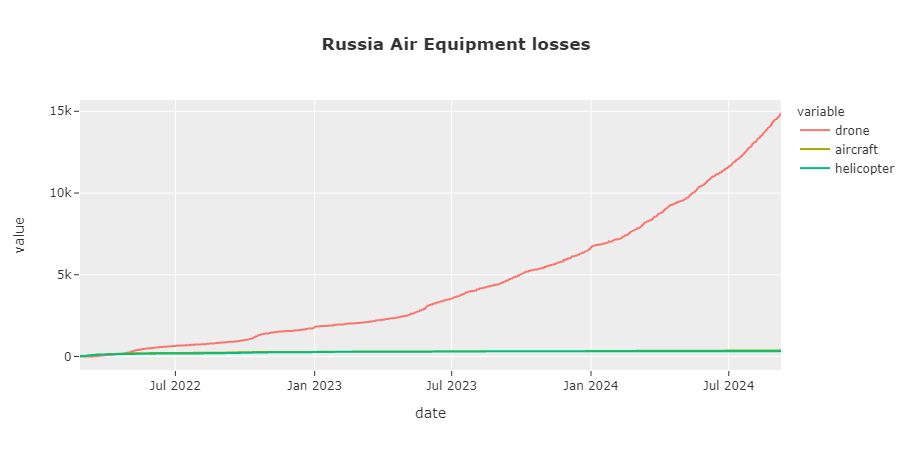

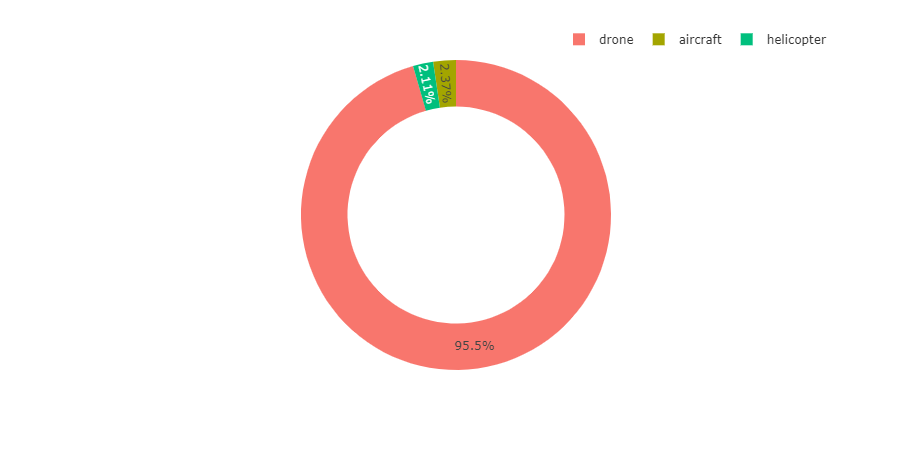

In [11]:
fig=px.line(df2,x='date',y=['drone','aircraft','helicopter'],template='ggplot2',title='<b>Russia Air Equipment losses')
fig.show()
names=['aircraft','helicopter','drone']
values=[df2['aircraft'].max(),df2['helicopter'].max(),df2['drone'].max()]
fig=px.pie(names=names,values=values,hole=.7,template='ggplot2')
fig.update_layout(title_x=0.5,legend=dict(orientation='h',yanchor='bottom',y=1.02,xanchor='right',x=1))

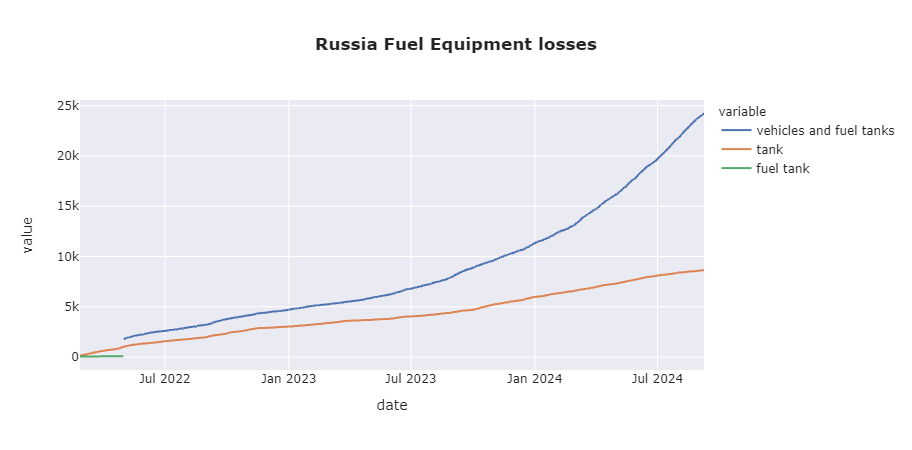

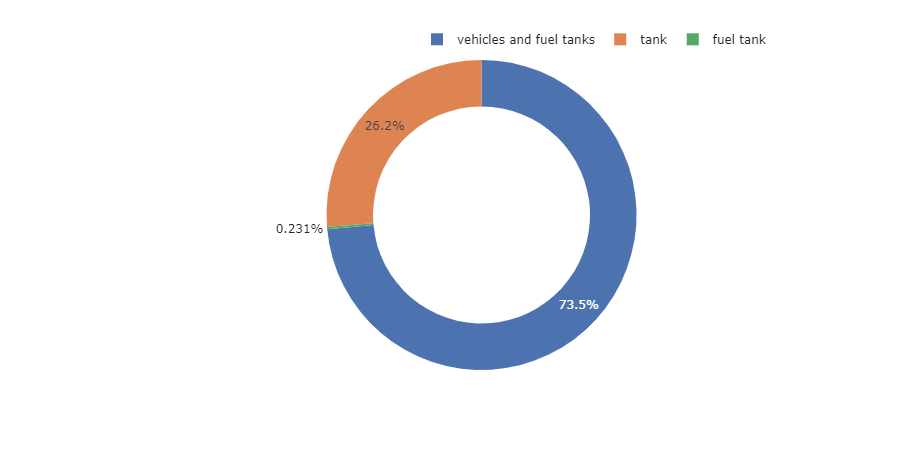

In [12]:
fig=px.line(df2,x='date',y=['vehicles and fuel tanks','tank','fuel tank'],template='seaborn',title='<b>Russia Fuel Equipment losses')
fig.show()
names=['tank','fuel tank','vehicles and fuel tanks']
values=[df2['tank'].max(),df2['fuel tank'].max(),df2['vehicles and fuel tanks'].max()]
fig=px.pie(names=names,values=values,hole=.7,template='seaborn')
fig.update_layout(title_x=0.5,legend=dict(orientation='h',yanchor='bottom',y=1.02,xanchor='right',x=1))

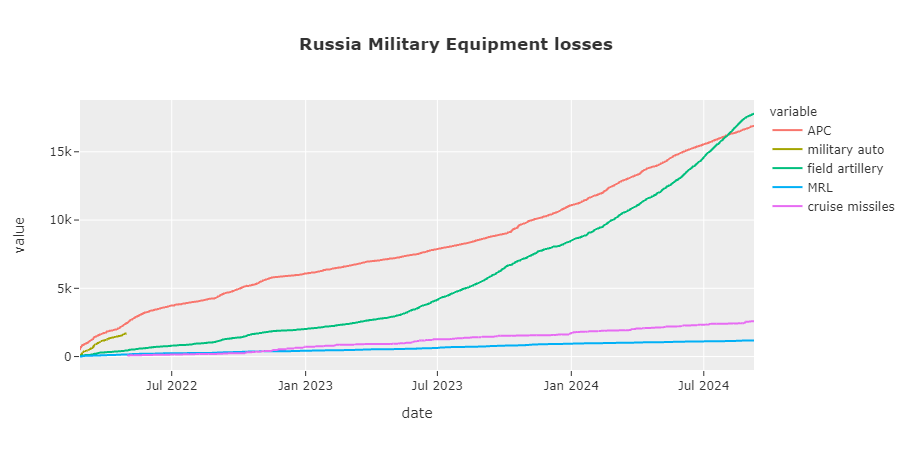

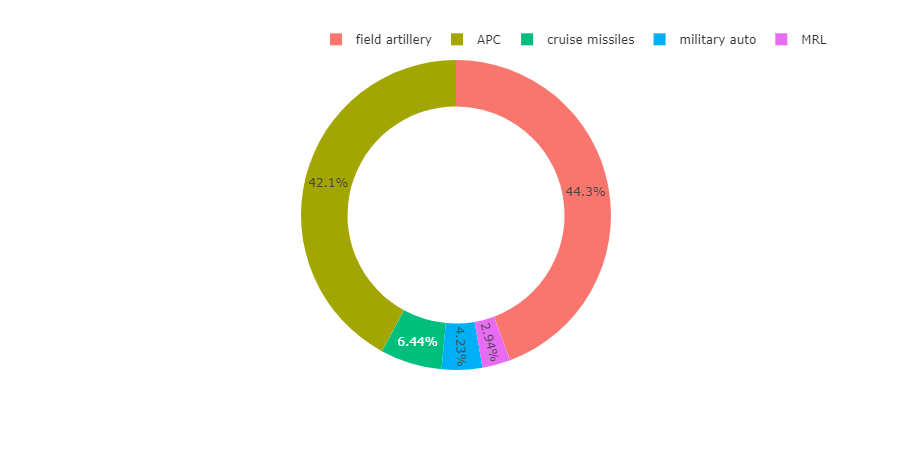

In [13]:
fig=px.line(df2,x='date',y=['APC','military auto','field artillery','MRL','cruise missiles'],template='ggplot2',title='<b>Russia Military Equipment losses')
fig.show()
names=['APC','MRL','military auto','cruise missiles','field artillery']
values=[df2['APC'].max(),df2['MRL'].max(),df2['military auto'].max(),df2['cruise missiles'].max(),df2['field artillery'].max()]
fig=px.pie(names=names,values=values,hole=.7,template='ggplot2')
fig.update_layout(title_x=0.5,legend=dict(orientation='h',yanchor='bottom',y=1.02,xanchor='right',x=1))

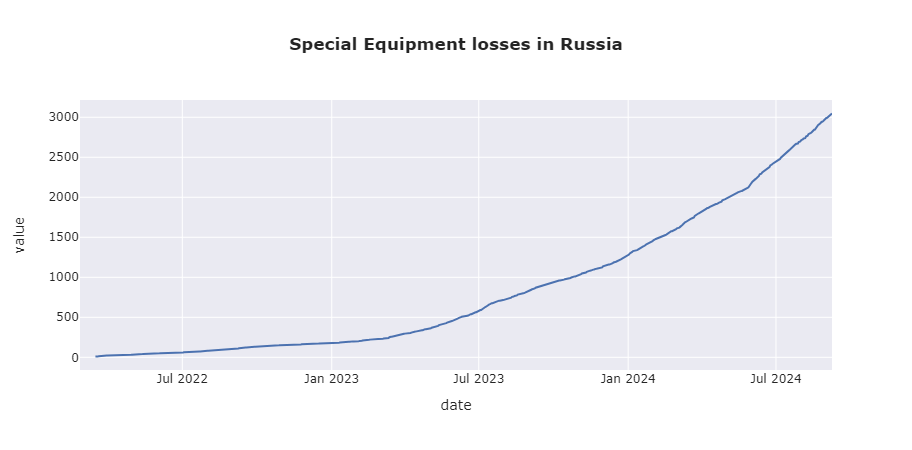

In [14]:
fig=px.line(df2,x='date',y=['special equipment'],template='seaborn',title='<b>Special Equipment losses in Russia')
fig.update_traces(showlegend=False)
fig.show()

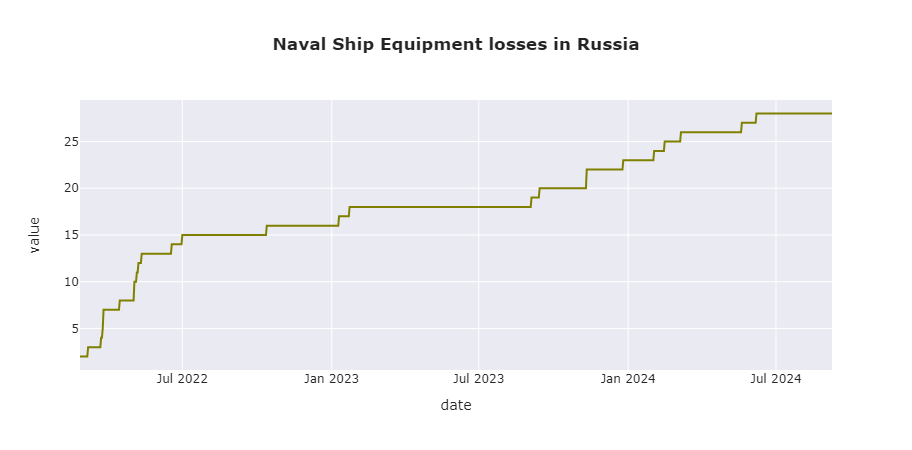

In [15]:
fig=px.line(df2,x='date',y=['naval ship'],template='seaborn',color_discrete_sequence=['olive'],title='<b>Naval Ship Equipment losses in Russia')
fig.update_traces(showlegend=False)
fig.show()

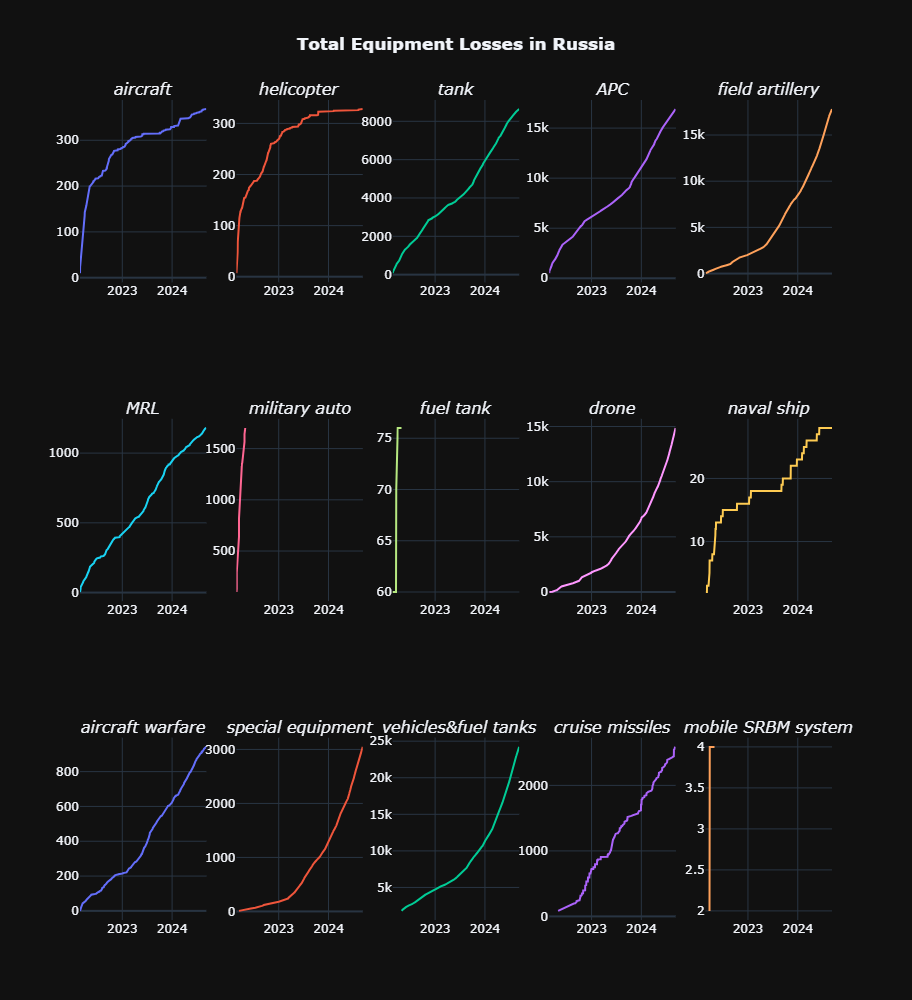

In [16]:
fig=go.Figure()
from plotly.subplots import make_subplots
fig=make_subplots(rows=3,cols=5,subplot_titles=('<i>aircraft', '<i>helicopter', '<i>tank', '<i>APC', '<i>field artillery', '<i>MRL', '<i>military auto', '<i>fuel tank', '<i>drone', '<i>naval ship', '<i>aircraft warfare', '<i>special equipment', '<i> vehicles&fuel tanks', '<i>cruise missiles', '<i>mobile SRBM system'))
fig.add_trace(go.Scatter(x=df2['date'],y=df2['aircraft'],name='aircraft'),row=1,col=1)
fig.add_trace(go.Scatter(x=df2['date'],y=df2['helicopter'],name='helicopter'),row=1,col=2)
fig.add_trace(go.Scatter(x=df2['date'],y=df2['tank'],name='tank'),row=1,col=3)
fig.add_trace(go.Scatter(x=df2['date'],y=df2['APC'],name='APC'),row=1,col=4)
fig.add_trace(go.Scatter(x=df2['date'],y=df2['field artillery'],name='field artillery'),row=1,col=5)
fig.add_trace(go.Scatter(x=df2['date'],y=df2['MRL'],name='MRL'),row=2,col=1)
fig.add_trace(go.Scatter(x=df2['date'],y=df2['military auto'],name='military auto'),row=2,col=2)
fig.add_trace(go.Scatter(x=df2['date'],y=df2['fuel tank'],name='fuel tank'),row=2,col=3)
fig.add_trace(go.Scatter(x=df2['date'],y=df2['drone'],name='drone'),row=2,col=4)
fig.add_trace(go.Scatter(x=df2['date'],y=df2['naval ship'],name='naval ship'),row=2,col=5)
fig.add_trace(go.Scatter(x=df2['date'],y=df2['anti-aircraft warfare'],name='anti-aircraft warfare'),row=3,col=1)
fig.add_trace(go.Scatter(x=df2['date'],y=df2['special equipment'],name='special equipment'),row=3,col=2)
fig.add_trace(go.Scatter(x=df2['date'],y=df2['vehicles and fuel tanks'],name='vehicles and fuel tanks'),row=3,col=3)
fig.add_trace(go.Scatter(x=df2['date'],y=df2['cruise missiles'],name='cruise missiles'),row=3,col=4)
fig.add_trace(go.Scatter(x=df2['date'],y=df2['mobile SRBM system'],name='mobile SRBM system'),row=3,col=5)
fig.update_layout(showlegend=False)
fig.update_layout(height=1000,width=1200,title_text='<b>Total Equipment Losses in Russia')
fig.update_layout(template='plotly_dark',title_x=0.5)

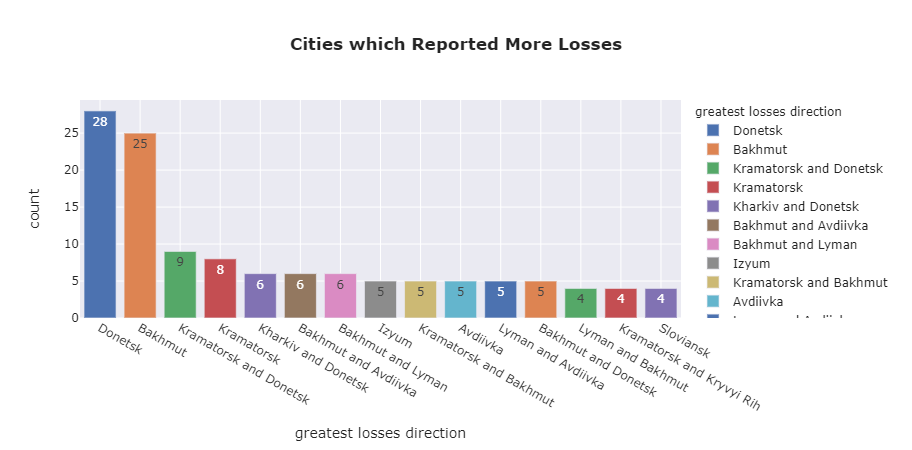

In [17]:
px.bar(df2.groupby(['greatest losses direction'],as_index=False)[['tank']].count().sort_values(by='tank',ascending=False).reset_index(drop=True).head(15),x='greatest losses direction',y='tank',color='greatest losses direction',text='tank',template='seaborn',labels={'tank':'count'},title='<b>Cities which Reported More Losses ')

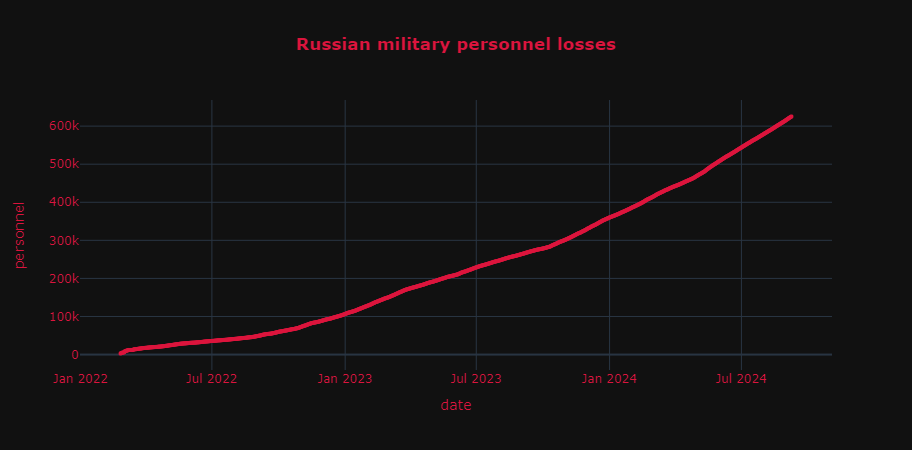

In [18]:
fig=px.line(df1,x='date',y='personnel',markers=True,template='plotly_dark',color_discrete_sequence=['crimson'],title='<b>Russian military personnel losses')
fig.update_traces(marker=dict(size=4))
fig.update_layout(font_color='crimson',title_x=0.5)

>Conclusion

<p> From the Analysis, The Most Equipment Losses take place in Donetsk city of Ukraine. Ukraine has lost control of 20 percent of its territory to Russian forces and their proxies in recent years. The destruction has already cost Ukraine at least 113.5 billion, and it may need more than 200 billion to rebuild. Donor nations have pledged to give Ukraine more than 83 billion in total.</p>

CR @ VARUN for Exercise